In [2]:
# approach is from this website: 
# https://www.pluralsight.com/guides/explore-python-libraries:-imbalanced-learn
# BalancedRandomForestClassifier differs from SMOTE and ADASYN in that it is 
# not a resampling method, but rather a classifier in which the training employs 
# resampling internally. For more info, see Breinman et al., 
# Using Random Forest to Learn Imbalanced Data.

In [3]:
# load necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
# os.getcwd()

In [5]:
# os.listdir(os.getcwd())

In [6]:
# read the csv x_data file into Pandas 

all_param_df = pd.read_csv("..\\reduced_data\\all_param_binary_tags.csv")
all_param_df.shape


(39624, 351)

In [7]:
# using binary classification for logistic regression
y_class = all_param_df['suc_class']

In [8]:
y_class

0        0
1        0
2        0
3        0
4        0
        ..
39619    1
39620    1
39621    1
39622    1
39623    1
Name: suc_class, Length: 39624, dtype: int64

In [9]:
# create new X parameters df
x_data = all_param_df.drop(['appid','maxccu','success_class','suc_class','followers','positive', 'negative', 'totaltags']  , axis=1)

In [10]:
x_data.columns

Index(['maxprice', 'maxdiscount', 'tagstrategy', 'tagaction', 'tagadventure',
       'tagdesignillustration', 'tagutilities', 'tagfreetoplay', 'tagrpg',
       'tagmassivelymultiplayer',
       ...
       'tagphilisophical', 'taggaming', 'tagfaith', 'tagmysterydungeon',
       'tagfeaturefilm', 'tagsteammachine', 'tagclicker', 'taghardware',
       'tag360video', 'tagvronly'],
      dtype='object', length=343)

In [11]:
x_data.shape

(39624, 343)

In [12]:
# Instantiate the classifier

from imblearn.ensemble import BalancedRandomForestClassifier

brf1 = BalancedRandomForestClassifier(n_estimators=100, random_state=0)

In [13]:
# define training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_class, test_size=0.2, random_state=5)

In [14]:
# baseline example
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [15]:
# Pre-processing  - scale the data using the MinMaxScaler and perform some feature selection

# from sklearn.preprocessing import MinMaxScaler
# x_scaler = MinMaxScaler().fit(X_train)

In [16]:
# apply the trained scales (MinMax) to the training and testing data

# X_train_scaled = x_scaler.transform(X_train)
# X_test_scaled = x_scaler.transform(X_test)

In [17]:
# Instantiate and Train model
y = y_train
X = X_train

brf1.fit(X_train, y_train)
y_pred = brf1.predict(X_test)

In [18]:
# Apply fitted model to test data - what accuracy?
print(f"Training Data Score: {brf1.score(X_train, y_train)}")
print(f"Testing Data Score: {brf1.score(X_test, y_test)}")

Training Data Score: 0.8710053944919398
Testing Data Score: 0.8619558359621451


In [19]:
# Understand precision, recall, f1 score with classification report for logistic classification
from sklearn.metrics import classification_report
predictions = brf1.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92      7764
           1       0.11      0.82      0.19       161

    accuracy                           0.86      7925
   macro avg       0.55      0.84      0.56      7925
weighted avg       0.98      0.86      0.91      7925



In [20]:
# thinking about baseline results:
# Support is not balanced - ~7700 of 1's and  160 0's
# Percision: for no success: 100%, better for successful games: 20%
# Percision= % of labeling an outcome that is correct from all the labels of that outcome
# labeled cancer correctly from all labeled cancer
# Recall: Fraction of positives found, 92% for 0, 93% for 1
# Recall - % of true label found from all true cases of the label
# how many of the cancer cases did you find
# f1 score: 92% due to overfitting on failure cases

<AxesSubplot:>

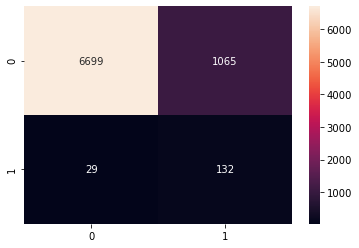

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = brf1.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm2, annot=True, fmt=".0f")

In [22]:
# Random Forests calculate feature importance
importances = brf1.feature_importances_
importances

array([1.10249227e-01, 4.94915814e-02, 1.49433056e-02, 1.88379053e-02,
       1.12378926e-02, 6.83298046e-04, 8.05854940e-04, 5.28542766e-03,
       1.21862491e-02, 8.97947426e-03, 1.57285475e-02, 7.97871363e-03,
       1.14474755e-02, 8.58726915e-03, 4.61917603e-03, 3.54834953e-03,
       2.20776317e-04, 2.20948645e-04, 3.25229113e-04, 3.78566540e-04,
       8.80035962e-04, 1.01342851e-04, 3.41257301e-05, 1.95746538e-04,
       1.59386038e-03, 5.27146806e-03, 8.73032592e-04, 3.72706229e-03,
       1.23031965e-03, 1.92457485e-03, 2.95621175e-03, 2.59709229e-04,
       2.34613922e-04, 1.28442054e-04, 2.57595100e-03, 2.01124337e-03,
       9.81916664e-03, 1.16517183e-02, 6.31226536e-03, 3.00201785e-04,
       1.46170886e-03, 7.61842149e-03, 3.22821586e-03, 6.25136696e-04,
       3.50094896e-04, 1.59144412e-03, 9.68085498e-06, 4.39658435e-03,
       7.13083135e-03, 2.53874067e-03, 5.40019811e-04, 2.05847303e-04,
       3.54006701e-04, 7.39160661e-03, 2.82834924e-02, 3.32924665e-03,
      

In [23]:
# evaluate feature importance from X parameters
features_df = pd.DataFrame(zip(x_data.columns, brf1.feature_importances_))
# sort by feature importance 
features_df = features_df.sort_values(by=[1], ascending=False)
# features_df



In [24]:
# drop all variables less than 0.02 feature importance
x_filtered_df = features_df[features_df[1]>=0.01]
x_filtered_df

,0,1
0,maxprice,0.110249
105,tagmultiplayer,0.070800
1,maxdiscount,0.049492
138,tagsingleplayer,0.033827
59,tagopenworld,0.031078
54,tagcoop,0.028283
3,tagaction,0.018838
86,taggreatsoundtrack,0.016144
10,tagindie,0.015729
2,tagstrategy,0.014943
